Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:37:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.20      0.18      0.19        50

    accuracy                           0.92      1022
   macro avg       0.58      0.57      0.57      1022
weighted avg       0.92      0.92      0.92      1022

ROC-AUC Score: 0.8052


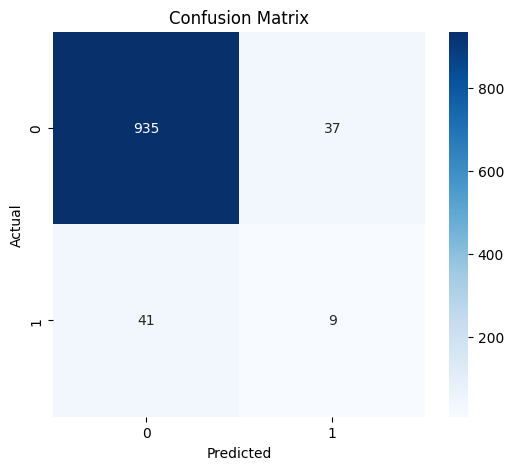

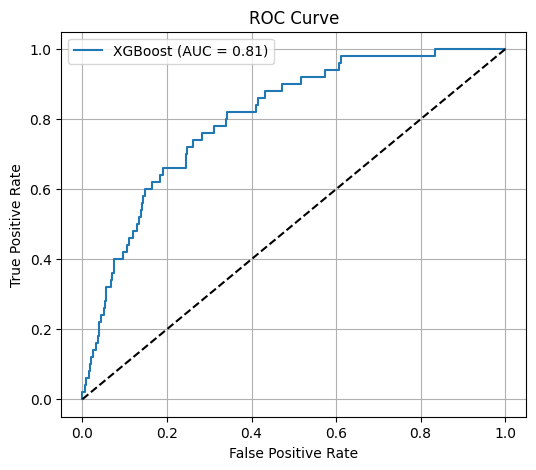

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from xgboost import XGBClassifier

# 📂 Upload dataset in Colab
from google.colab import files
uploaded = files.upload()

# 🛠️ Load dataset
df = pd.read_csv(next(iter(uploaded)))

# 🔥 Preprocessing

# 1. Drop ID column
df = df.drop('id', axis=1)

# 2. Fill missing values in 'bmi' with median
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# 3. One-Hot Encode categorical columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4. Split into features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# 5. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 6. Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Handle class imbalance for XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# 🚀 Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
xgb.fit(X_train, y_train)

# 🎯 Predictions
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_score:.4f}")

# 🎨 1. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 🎨 2. ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 📂 Load Dataset
df = pd.read_csv('/mnt/data/healthcare-dataset-stroke-data.csv')

# 🛠 Preprocessing
df = df.drop('id', axis=1)

# Fill missing values
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# One-Hot Encoding
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Features and Target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🚀 Train Models
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# 3. XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
xgb.fit(X_train, y_train)

# 🎯 Predict probabilities
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# 📈 ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# 📊 Accuracy Comparison
acc_dt = accuracy_score(y_test, dt.predict(X_test))
acc_lr = accuracy_score(y_test, lr.predict(X_test))
acc_xgb = accuracy_score(y_test, xgb.predict(X_test))

# 🎨 Plot ROC Curves
plt.figure(figsize=(10,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC: {roc_auc_score(y_test, y_pred_proba_dt):.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC: {roc_auc_score(y_test, y_pred_proba_lr):.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.2f})")
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# 📊 Bar Chart: Accuracy
models = ['Decision Tree', 'Logistic Regression', 'XGBoost']
accuracies = [acc_dt, acc_lr, acc_xgb]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/healthcare-dataset-stroke-data.csv'

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:12:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


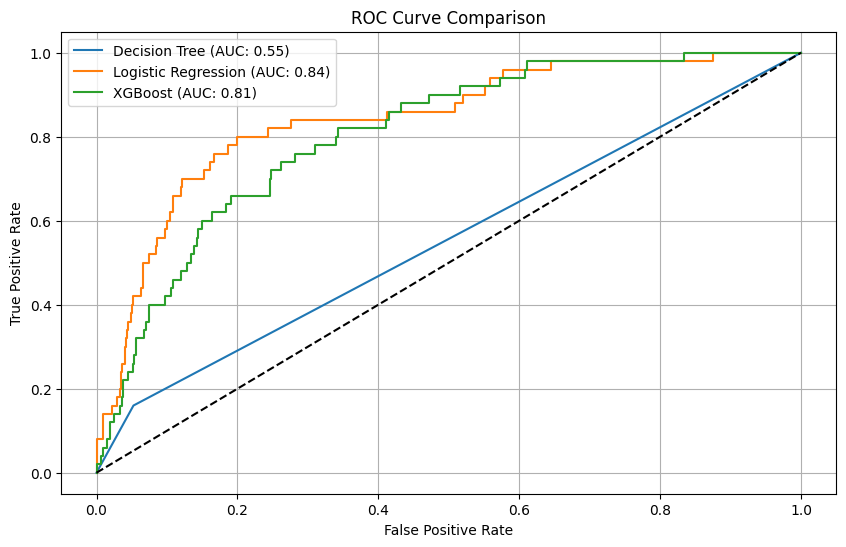

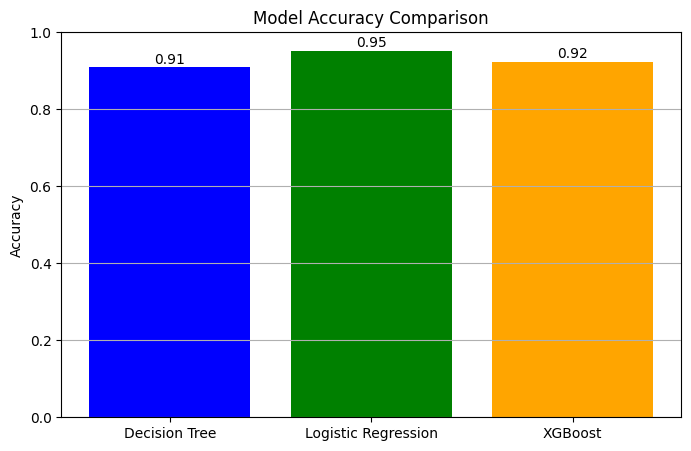

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 📂 Upload and Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('healthcare-dataset-stroke-data.csv')  # <- only filename!

# 🛠 Preprocessing
df = df.drop('id', axis=1)
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🚀 Train Models
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)
xgb.fit(X_train, y_train)

# 🎯 Predict
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# 📈 ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# 📊 Accuracy
acc_dt = accuracy_score(y_test, dt.predict(X_test))
acc_lr = accuracy_score(y_test, lr.predict(X_test))
acc_xgb = accuracy_score(y_test, xgb.predict(X_test))

# 🎨 Plot ROC Curve
plt.figure(figsize=(10,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC: {roc_auc_score(y_test, y_pred_proba_dt):.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC: {roc_auc_score(y_test, y_pred_proba_lr):.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# 📊 Accuracy Bar Chart
models = ['Decision Tree', 'Logistic Regression', 'XGBoost']
accuracies = [acc_dt, acc_lr, acc_xgb]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (2).csv
Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022

ROC-AUC Score: 0.8422
Accuracy Score: 0.9521


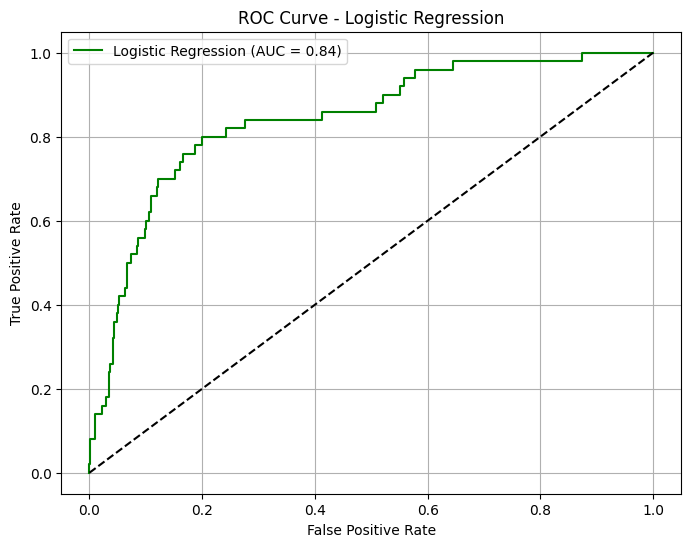

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# 📂 Upload and Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('healthcare-dataset-stroke-data.csv')  # <- Only filename here

# 🛠️ Preprocessing

# 1. Drop ID column
df = df.drop('id', axis=1)

# 2. Fill missing values in 'bmi' with median
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# 3. One-Hot Encode categorical columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4. Split into features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# 5. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 6. Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🚀 Train Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# 🎯 Make Predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_score:.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# 🎨 Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_score:.2f})", color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()
